<a href="https://colab.research.google.com/github/mariammur/CS4410/blob/main/Hw_7_(16_4)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd 
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
tf.keras.datasets.mnist.load_data(path="mnist.npz")



((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
assert X_train.shape == (60000, 28, 28)
assert X_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

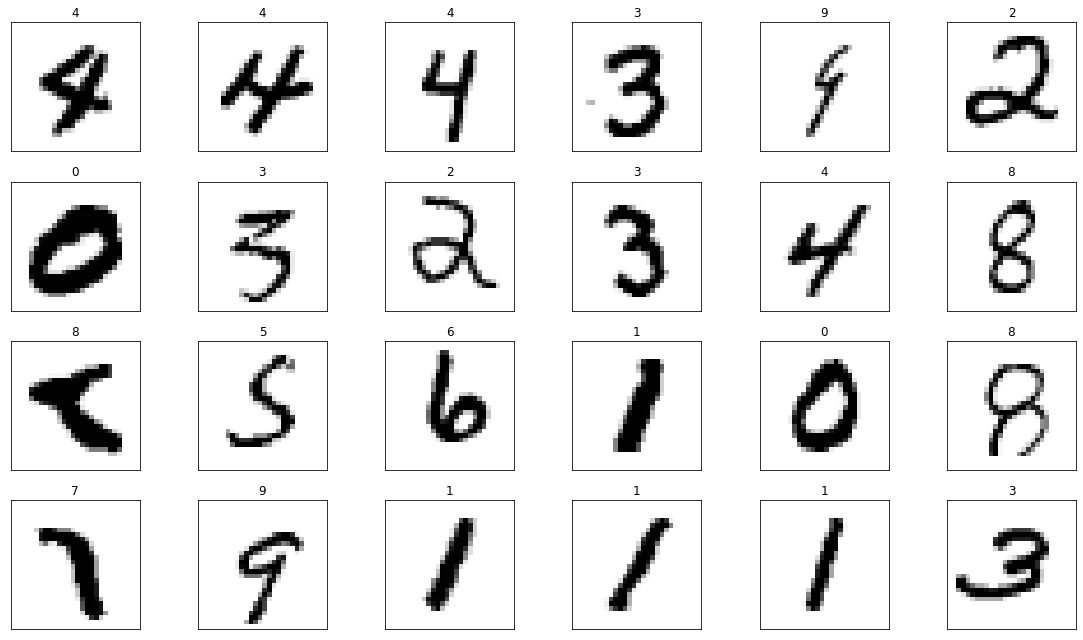

In [4]:
import numpy as np
index = np.random.choice(np.arange(len(X_train)), 24, replace=False)  # 24 indices
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 9))

for item in zip(axes.ravel(), X_train[index], y_train[index]):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])  # remove x-axis tick marks
    axes.set_yticks([])  # remove y-axis tick marks
    axes.set_title(target)

plt.tight_layout()

In [5]:
X_train = X_train.astype('float32') / 255


In [6]:
X_test = X_test.astype('float32') / 255

In [7]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_train.shape

(60000, 10)

In [8]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [9]:
y_test = to_categorical(y_test)
y_test.shape

(10000, 10)

In [10]:
from tensorflow.keras.models import Sequential 
cnn = Sequential()

In [11]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D 


In [12]:
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', 
               input_shape=(28, 28, 1)))


In [13]:
cnn.add(MaxPooling2D(pool_size=(2, 2)))


In [14]:
cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))

In [15]:
cnn.add(Flatten())
cnn.add(Dense(units=128, activation='relu'))
cnn.add(Dense(units=10, activation='softmax'))

In [16]:
cnn.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                                                 
 dense (Dense)               (None, 128)               4

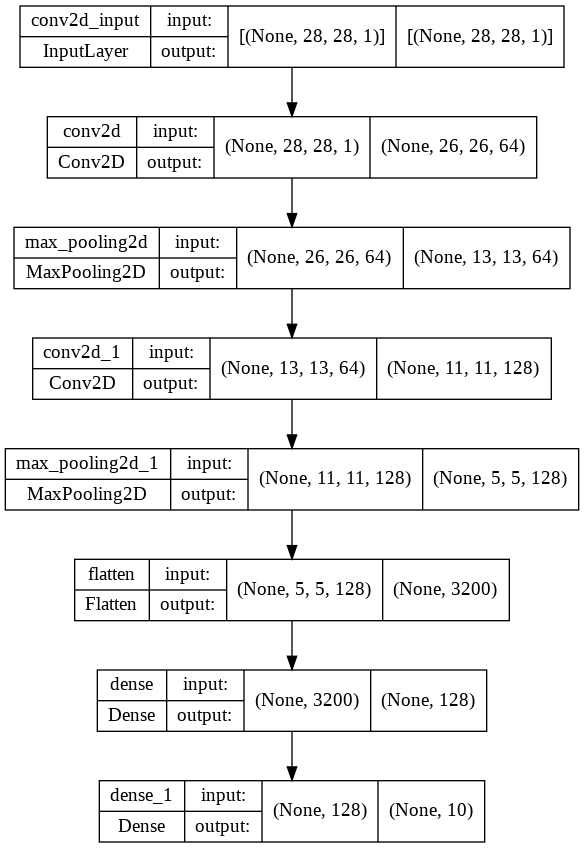

In [17]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(cnn, to_file='convnet.png', show_shapes=True, 
           show_layer_names=True)
Image(filename='convnet.png')  

In [18]:
cnn.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

In [19]:
cnn.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)


Epoch 1/5
844/844 [==============================] - 118s 139ms/step - loss: 0.1481 - accuracy: 0.9554 - val_loss: 0.0394 - val_accuracy: 0.9883
Epoch 2/5
844/844 [==============================] - 118s 140ms/step - loss: 0.0419 - accuracy: 0.9862 - val_loss: 0.0370 - val_accuracy: 0.9888
Epoch 3/5
844/844 [==============================] - 118s 140ms/step - loss: 0.0293 - accuracy: 0.9904 - val_loss: 0.0511 - val_accuracy: 0.9855
Epoch 4/5
844/844 [==============================] - 118s 140ms/step - loss: 0.0213 - accuracy: 0.9932 - val_loss: 0.0301 - val_accuracy: 0.9915
Epoch 5/5
844/844 [==============================] - 118s 139ms/step - loss: 0.0156 - accuracy: 0.9951 - val_loss: 0.0335 - val_accuracy: 0.9915


In [20]:
loss, accuracy = cnn.evaluate(X_test, y_test)


313/313 [==============================] - 6s 20ms/step - loss: 0.0271 - accuracy: 0.9913


In [21]:
loss


0.027114510536193848

In [22]:
accuracy


0.9912999868392944

In [23]:
predictions = cnn.predict(X_test)


In [24]:
y_test[0]


array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [25]:
for index, probability in enumerate(predictions[0]):
    print(f'{index}: {probability:.10%}')

0: 0.0000000003%
1: 0.0000000028%
2: 0.0000007294%
3: 0.0000021751%
4: 0.0000000000%
5: 0.0000000028%
6: 0.0000000000%
7: 100.0000000000%
8: 0.0000000551%
9: 0.0000012450%


In [26]:
images = X_test.reshape((10000, 28, 28))
incorrect_predictions = []

In [27]:
for i, (p, e) in enumerate(zip(predictions, y_test)):
    predicted, expected = np.argmax(p), np.argmax(e)

    if predicted != expected:  # prediction was incorrect
        incorrect_predictions.append(
            (i, images[i], predicted, expected))
len(incorrect_predictions)

87

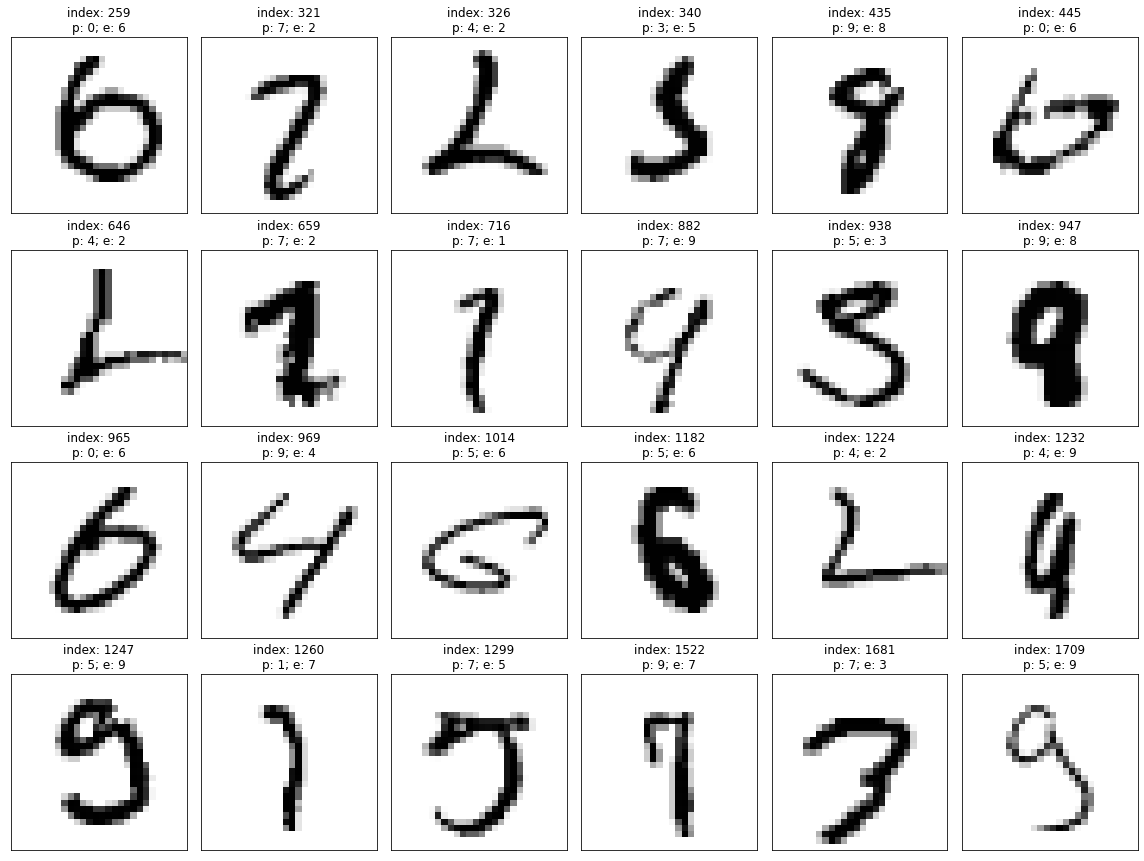

In [28]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 12))

for axes, item in zip(axes.ravel(), incorrect_predictions):
    index, image, predicted, expected = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])  # remove x-axis tick marks
    axes.set_yticks([])  # remove y-axis tick marks
    axes.set_title(f'index: {index}\np: {predicted}; e: {expected}')
plt.tight_layout()

In [29]:
def display_probabilities(prediction):
    for index, probability in enumerate(prediction):
        print(f'{index}: {probability:.10%}')

In [30]:
display_probabilities(predictions[340])


0: 0.0000038482%
1: 0.0000377325%
2: 0.0000010156%
3: 83.0922484398%
4: 0.0000063144%
5: 16.9076055288%
6: 0.0000189737%
7: 0.0000000117%
8: 0.0000441914%
9: 0.0000305016%


In [31]:
display_probabilities(predictions[740])


0: 0.0000004787%
1: 0.0003279822%
2: 0.0203421892%
3: 0.0004041995%
4: 68.5269176960%
5: 0.0000053281%
6: 0.0000000061%
7: 0.0419933553%
8: 0.0008360134%
9: 31.4091771841%


In [32]:
display_probabilities(predictions[1260])


0: 0.0005383287%
1: 52.4675488472%
2: 1.1566353962%
3: 0.0875174475%
4: 0.0011073527%
5: 0.0007395663%
6: 0.0000065729%
7: 46.0402131081%
8: 0.0388236716%
9: 0.2068738453%


In [33]:
cnn.save('mnist_cnn.h5')


In [34]:
cnn.add(Dense(units=128, activation='relu'))
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                                                 
 dense (Dense)               (None, 128)               4

In [35]:
cnn.pop() 

In [37]:
cnn.pop() 

In [38]:
cnn.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                                                 
 dense (Dense)               (None, 128)               4